# Xarray for multidimensional gridded data

We often deal with _multidimensional data_:

$$ T(x, y, t) $$

where $x$ is longitude, $y$ is latitude, and $t$ is time.

The point of xarray is to provide convenience for working with this type of data. 

![xarray data model](https://github.com/pydata/xarray/raw/master/doc/_static/dataset-diagram.png)

In [25]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
sns.set_context('notebook')

## Xarray data structures

Xarray has two fundamental data structures:
* a `DataArray`, which holds a single multi-dimensional variable and its coordinates
* a `Dataset`, which holds multiple variables that potentially share the same coordinates

### DataArray

A `DataArray` has four essential attributes:
* `values`: a `numpy.ndarray` holding the array’s values
* `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`)
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

Let's start by constructing some DataArrays manually 

A simple DataArray without dimensions or coordinates isn't much use.

In [6]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

We can add a dimension name...

In [7]:
da_1d = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da_1d

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

But things get most interesting when we add a coordinate:

In [22]:
da_1d = xr.DataArray([9, 0, 2, 1, 0],
                     dims=['x'],
                     coords={'x': [10, 20, 30, 40, 50]},
                     name="one-dim-data")
da_1d

<xarray.DataArray 'one-dim-data' (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

Xarray has built-in plotting.

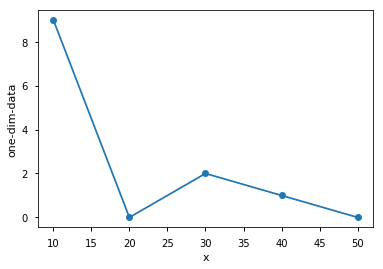

In [27]:
da_1d.plot(marker='o');

### A Mult-Dimensional DataArray

In [59]:
Nx, Ny, Nz = 150, 250, 100  # We unpack a tuple

da_random = xr.DataArray(
    np.random.randn(Nx, Ny, Nz),
    dims=['x', 'y', 'z'],
    coords={'z': np.arange(Nz),
            'y': np.linspace(-1, 1, Ny),
            'x': np.linspace(0, 1, Nx)},
    name="random_data")
da_random

<xarray.DataArray 'random_data' (x: 150, y: 250, z: 100)>
array([[[-0.421193, -0.286462, ..., -0.181795,  1.677551],
        [-0.540156,  0.67722 , ...,  0.237416, -0.633947],
        ...,
        [ 0.226722, -0.373982, ...,  1.69917 , -0.204325],
        [ 0.903868, -0.119556, ...,  1.097289, -0.450354]],

       [[-1.711247, -1.586618, ...,  2.033183,  0.549521],
        [ 0.338363, -0.015448, ..., -0.285945, -1.316168],
        ...,
        [-0.31334 , -0.19481 , ...,  0.52717 ,  0.177398],
        [ 0.654878, -1.366718, ...,  1.618742, -0.299932]],

       ...,

       [[-0.102966, -1.18341 , ...,  0.238369, -1.322897],
        [-0.078368,  0.087605, ..., -0.850296, -0.510952],
        ...,
        [ 0.686337, -1.347304, ...,  0.102445, -1.401594],
        [ 1.049576,  0.293704, ...,  0.398422,  1.230065]],

       [[ 0.761893,  0.220854, ...,  0.413052, -1.298734],
        [ 0.414938, -0.169579, ...,  2.00657 , -1.217882],
        ...,
        [-0.669618, -0.428092, ...,  0.747307

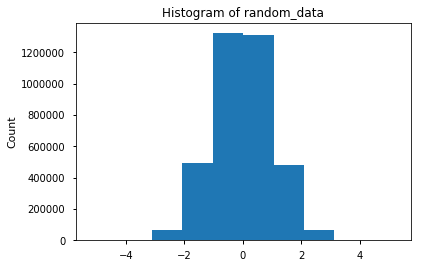

In [60]:
da_random.plot();

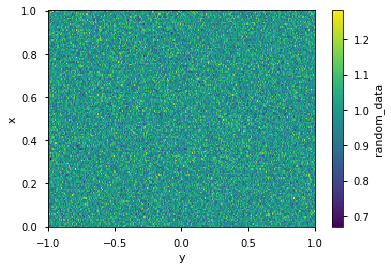

In [62]:
da_random.std("z").plot();

## DataSets

Let's construct a Data-Set with two DataArrays

In [67]:
Nx, Ny = 150, 250

y = np.linspace(-1, 1, Ny)
x = np.linspace(0, 1, Nx)

random_data = xr.Dataset(
    data_vars={'random_2d': (('x', 'y'), np.random.randn(Nx, Ny)),
               'random_1d': (('x'), np.random.randn(Nx))},
    coords={'y': y, 'x': x})

In [68]:
random_data

<xarray.Dataset>
Dimensions:    (x: 150, y: 250)
Coordinates:
  * y          (y) float64 -1.0 -0.992 -0.9839 -0.9759 -0.9679 -0.9598 ...
  * x          (x) float64 0.0 0.006711 0.01342 0.02013 0.02685 0.03356 ...
Data variables:
    random_2d  (x, y) float64 -1.179 0.6103 0.4264 -0.8294 0.4895 -1.074 ...
    random_1d  (x) float64 0.7645 0.2842 -1.382 0.269 -0.0798 0.438 0.3124 ...

In [69]:
Nz = 100
z = np.arange(Nz)

da_3d = xr.DataArray(
    np.random.randn(Nx, Ny, Nz),
    dims=('x', 'y', 'z'),
    coords={'x': x, 'y': y, 'z': z},
    name="random_3d")

random_data["random_3d"] = da_3d

In [71]:
random_data

<xarray.Dataset>
Dimensions:    (x: 150, y: 250, z: 100)
Coordinates:
  * y          (y) float64 -1.0 -0.992 -0.9839 -0.9759 -0.9679 -0.9598 ...
  * x          (x) float64 0.0 0.006711 0.01342 0.02013 0.02685 0.03356 ...
  * z          (z) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    random_2d  (x, y) float64 -1.179 0.6103 0.4264 -0.8294 0.4895 -1.074 ...
    random_1d  (x) float64 0.7645 0.2842 -1.382 0.269 -0.0798 0.438 0.3124 ...
    random_3d  (x, y, z) float64 0.1641 -0.4011 0.8991 2.744 1.343 0.1562 ...

The `*` symbol in the representation above indicates that `level` and `date` are "dimension coordinates" (they describe the coordinates associated with data variable axes) while `lon` and `lat` are "non-dimension coordinates". We can make any variable a non-dimension coordiante.

## Working with Labeled Data

Xarray's labels make working with multidimensional data much easier.

### Selecting Data (Indexing)

We can always use regular numpy indexing and slicing on DataArrays

However, it is often much more powerful to use xarray's `.sel()` method to use label-based indexing.

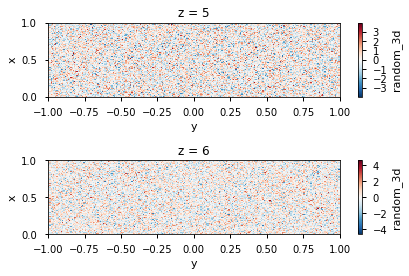

In [86]:
fig, ax = plt.subplots(2, 1)

random_data.random_3d.sel(z=5.4, method='nearest').plot(ax=ax[0]);
random_data.random_3d.sel(z=5.6, method='nearest').plot(ax=ax[1]);

fig.tight_layout();

`.sel()` also supports slicing. Unfortunately we have to use a somewhat awkward syntax, but it still works.

`.sel()` also works on the whole Dataset

---

*This notebook is based on a notebook from the [CC BY-NC 4.0 licensed](https://creativecommons.org/licenses/by/4.0/) course notes on [research computing by Ryan Abernathey et al.](https://rabernat.github.io/research_computing/).  The original notebook was downloaded from <https://raw.githubusercontent.com/rabernat/research_computing/master/content/lectures/python/xarray.ipynb> on 2018-02-21.  To track modifications relative to this original version, please check the history of <https://git.geomar.de/edu/python-intro-201804/>.*